## Query SQLite

In [2]:
import sqlite3

In [3]:
conn = sqlite3.connect('data/ylevaalikone2015.sqlite3')

In [4]:
c = conn.cursor()
for row in c.execute('select vaalipiiri, count(id) from vastaajat group by vaalipiiri'):
    print(row)

(1, 269)
(2, 394)
(3, 166)
(4, 126)
(5, 7)
(6, 127)
(7, 203)
(8, 149)
(9, 139)
(10, 156)
(11, 127)
(12, 165)
(13, 118)


## Plot using `matplotlib`

In [5]:
import matplotlib.pyplot as plt

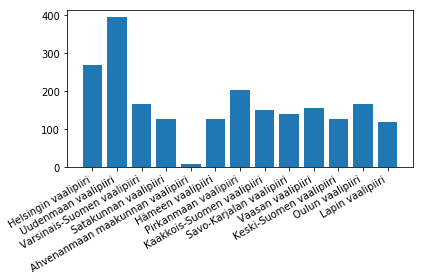

In [7]:
c = conn.cursor()
(ps, vs, cs) = zip(*c.execute('''
select v.id, v.value, count(s.id)
 from vastaajat as s
 join vaalipiirit as v
  on s.vaalipiiri = v.id
 group by s.vaalipiiri
'''))

plt.bar(ps, cs)
plt.xticks(ps, vs, rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()

## Plot using `pandas`

In [8]:
import pandas as pd

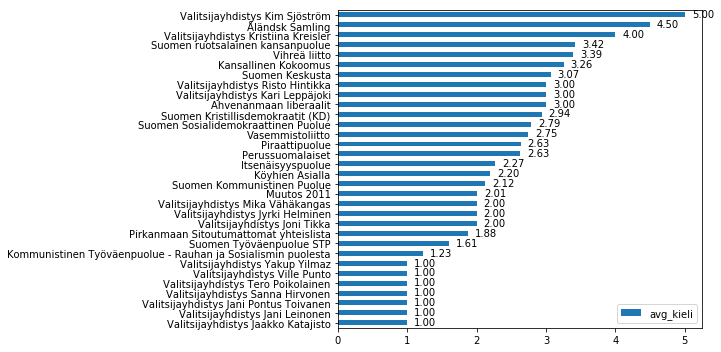

In [12]:
df = pd.read_sql_query('''
select puolue, avg(kieli_count) as avg_kieli
 from (
  select count(kielitaidot.kieli_id) as kieli_count, puolueet.value as puolue, puolueet.id as puolue_id
   from kielitaidot
   join vastaajat
    on kielitaidot.vastaaja_id = vastaajat.id
   join puolueet
    on vastaajat.puolue = puolueet.id
  group by vastaajat.id)
 group by puolue
 order by avg_kieli asc''', conn)
ax = df.plot(kind = 'barh', figsize=(10, 5))
ax.set_yticklabels(df.puolue)
for p in ax.patches:
    ax.annotate('{0:.2f}'.format(p.get_width()), xy=(p.get_width()+0.1, p.get_y()))
plt.tight_layout()
plt.show()